<a href="https://colab.research.google.com/github/Harshit-Singhal-0100/DOG_vs_CAT_CNN/blob/main/DOG_vs_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [2]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import cv2


In [4]:

# Load training and validation datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:

# Function to process images: normalize them to [0, 1]
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

# Apply processing function to datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [6]:

# Define the CNN model
model = Sequential()

# Add Conv2D and MaxPooling layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the output from the Conv2D layers
model.add(Flatten())

# Add Fully Connected (Dense) layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # Add Dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))  # Add Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (dog vs cat)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.5603 - loss: 0.7221 - val_accuracy: 0.7258 - val_loss: 0.5471
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 69ms/step - accuracy: 0.7306 - loss: 0.5401 - val_accuracy: 0.7758 - val_loss: 0.4651
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8070 - loss: 0.4139 - val_accuracy: 0.8034 - val_loss: 0.4339
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 74ms/step - accuracy: 0.8691 - loss: 0.3043 - val_accuracy: 0.7936 - val_loss: 0.5594
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.9248 - loss: 0.1872 - val_accuracy: 0.7882 - val_loss: 0.7238
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.9595 - loss: 0.1070 - val_accuracy: 0.7964 - val_loss: 0.7411
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 74ms/step - accuracy: 0.9706 - loss: 0.0806 - val_accuracy: 0.7924 - val_loss: 0.9004
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 67ms/step - accuracy: 0.9804 - loss: 0.0584 - 

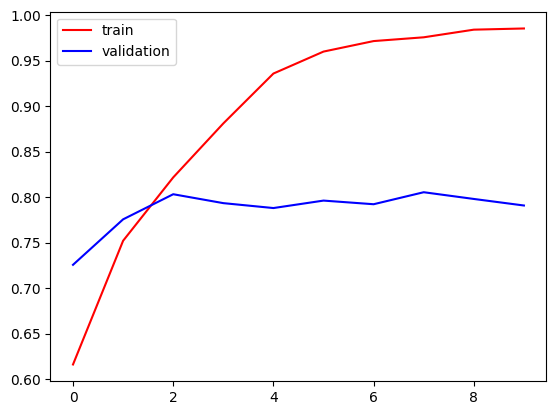

In [9]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


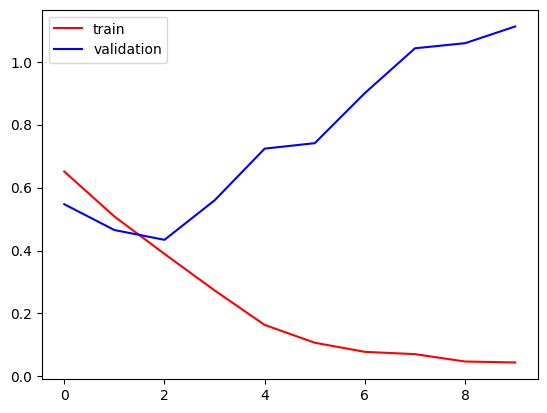

In [10]:

# Plot training and validation loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
Prediction (1 = Dog, 0 = Cat): 0.9999732


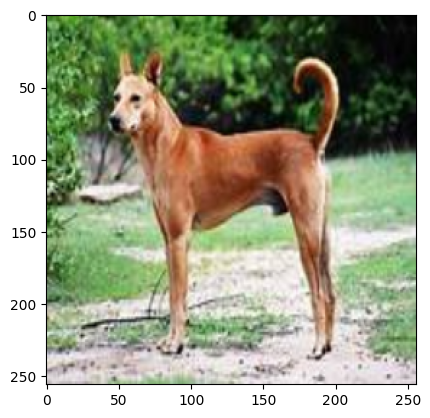

In [14]:

# Load and preprocess a test image for prediction
test_img = cv2.imread('/content/dog.jpeg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
test_img_resized = cv2.resize(test_img, (256, 256))  # Resize to match model input size
test_img_normalized = test_img_resized / 255.0  # Normalize to [0, 1]
test_img_expanded = tf.expand_dims(test_img_normalized, axis=0)  # Add batch dimension

# Predict using the model
prediction = model.predict(test_img_expanded)

# Output the prediction
print("Prediction (1 = Dog, 0 = Cat):", prediction[0][0])

# Display the image
plt.imshow(test_img_resized)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction (1 = Dog, 0 = Cat): 0.0015077242


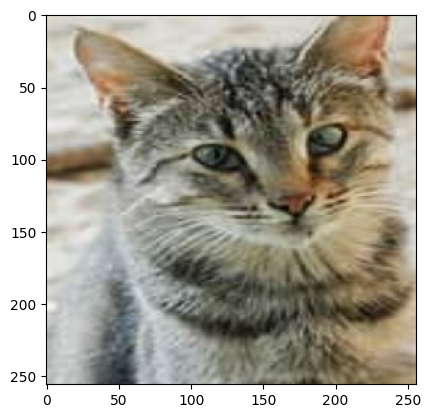

In [29]:

test_img = cv2.imread('/content/CAT.jpeg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
test_img_resized = cv2.resize(test_img, (256, 256))  # Resize to match model input size
test_img_normalized = test_img_resized / 255.0  # Normalize to [0, 1]
test_img_expanded = tf.expand_dims(test_img_normalized, axis=0)  # Add batch dimension

# Predict using the model
prediction = model.predict(test_img_expanded)

# Output the prediction
print("Prediction (1 = Dog, 0 = Cat):", prediction[0][0])

# Display the image
plt.imshow(test_img_resized)
plt.show()